In [154]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [89]:
#Importing the data set.
data = pd.read_csv("diabetes.csv")

### Viewing our data and its description

In [5]:
#data.head(20)
#data.tail(10)

In [6]:
#data.describe()

In [7]:
#data.count()

In [8]:
#data.columns.values

In [9]:
#data.shape

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#gives the number of null values in our dataset.
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h6>Luckily we dont have any null values in our data, if we had any then, we could apply techiques like
replacing null value with mean value of that column etc.<h6>


<h5> Now, Lets see how many people suffer from diabetes <h5>

In [12]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<h5>Result shows us that, out of 768 people, 268 people are suffering from diabetes and rest of 500 people are not.<h5>

### Analyzing Features

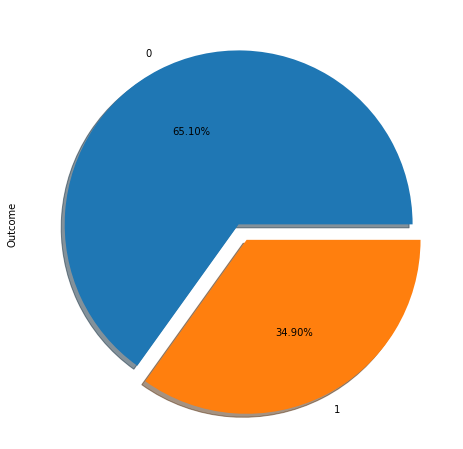

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax = ax,shadow=True);
#data['Outcome'].value_counts().plot.pie(shadow = True, explode = [0,0.1]);

#the autopct parameter is  notworking so, its not showing the percentage

<h4>Here, 65% of women do not has diabetes and 35% of women do have <h4>

In [14]:
var = data.groupby(['Age','Outcome'])['Outcome'].count()
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 10) 
var

#https://stackoverflow.com/questions/59916601/how-to-display-whole-table-in-the-output-in-jupyter-notebook

Age  Outcome
21   0          58
     1           5
22   0          61
     1          11
23   0          31
                ..
68   0           1
69   0           2
70   1           1
72   0           1
81   0           1
Name: Outcome, Length: 96, dtype: int64

<h4> This table shows that, most of the data is from girls age from 21-30,i.e as the age increses, the number of 
women's data decresases. We will visualize it in the cell below <h4>

##### Lets create a histogram of age

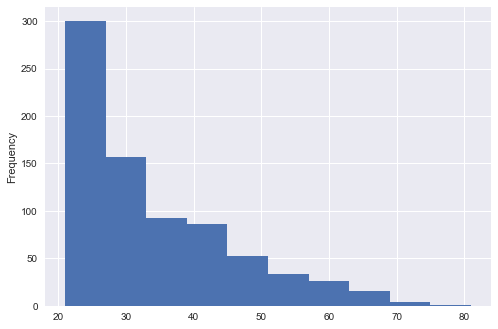

In [28]:
plt.style.use('seaborn')
data['Age'].plot.hist();

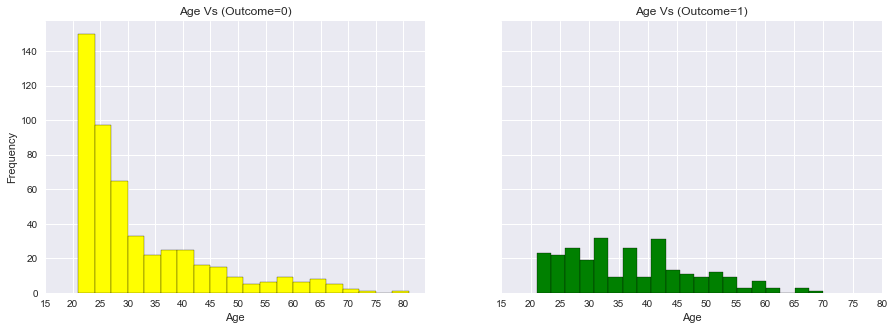

In [29]:
#Lets see in comparision
plt.style.use('seaborn-dark-palette')
fig, ax = plt.subplots(1,2,figsize = (15,5), sharey = True)
data[data['Outcome']==0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='Black',color='Yellow');
x1=list(range(15,85,5))
ax[0].set_xticks(x1);
ax[0].set(title="Age Vs (Outcome=0)",
          xlabel = 'Age');

data[data["Outcome"]==1].Age.plot.hist(ax=ax[1],bins=20, edgecolor='Black',color='Green');
x2=list(range(15,85,5))
ax[1].set_xticks(x2);
ax[1].set(title ='Age Vs (Outcome=1)', 
                xlabel = 'Age',
                ylabel = 'Frequency of Outcome');

#### We can see to comparision of women who have and do not have diabetes according to there age.

In [17]:
#fig, ax = plt.subplots(1,2,figsize=(10,5))
#x = data[data['Outcome']==0]
#histogram = ax[0].hist(x, bins = 20);

In [18]:
data.head()

,Pregnancies,...,Outcome
0,6,...,1
1,1,...,0
2,8,...,1
3,1,...,0
4,0,...,1


In [19]:
less_50 = data[data['Age']<50]
less_50.head()
len(less_50)

679

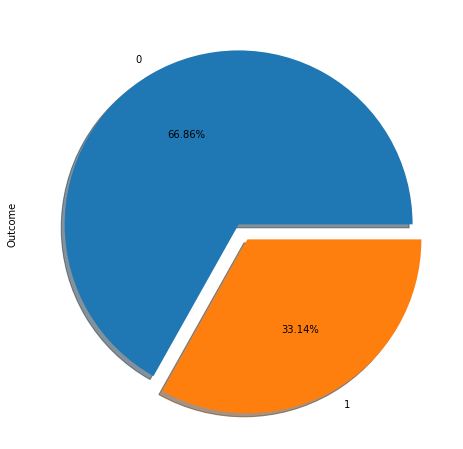

In [20]:
fig, ax = plt.subplots(figsize = (8,8))
less_50['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax = ax,shadow=True);

#### This shows that, taking or not taking data of women above the age of 50 do not make much difference.

<h6>lets see the data by taking age and bloodpressure in account<h6>

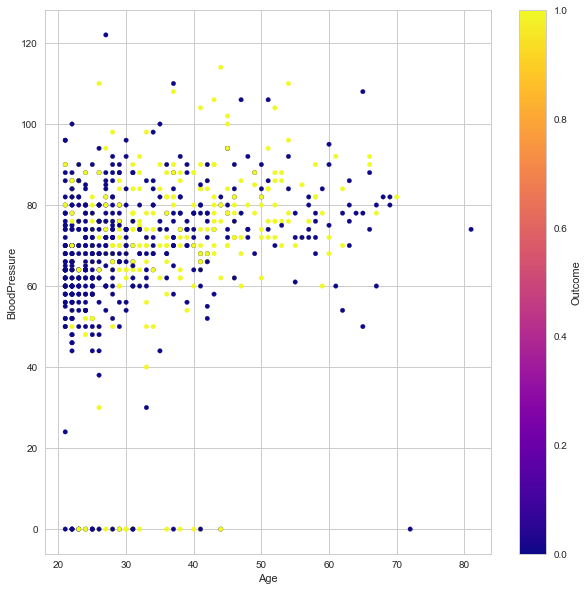

In [50]:
plt.style.use('seaborn-dark-palette') #by default gives black and white colour
fix, ax = plt.subplots(figsize = (10,10))
data.plot.scatter(x='Age',y='BloodPressure',c='Outcome',ax=ax, cmap="plasma"); #cmap changes the colour
#this shows the distribution of our data.

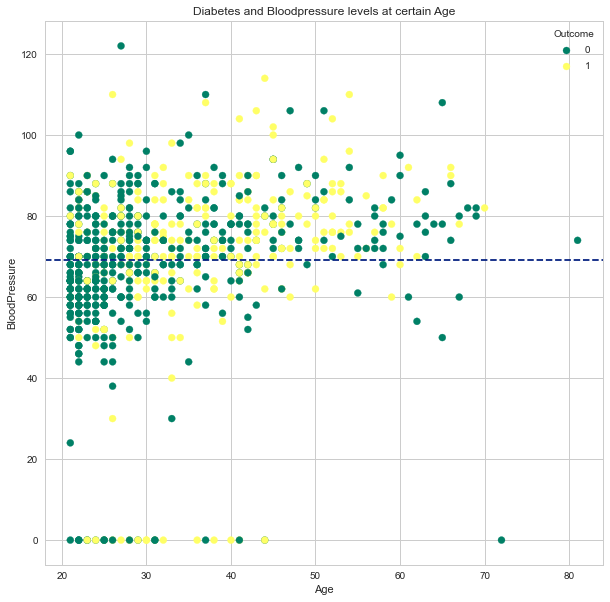

In [49]:
#plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (10,10))
scatter = ax.scatter(x =data['Age'],
                     y=data['BloodPressure'],
                     c=data['Outcome'],
                     cmap="summer")
ax.set(title = "Diabetes and Bloodpressure levels at certain Age",
       xlabel = "Age",
       ylabel = "BloodPressure");
ax.legend(*scatter.legend_elements(), title="Outcome");
#legend is use to unpack the legend elements, in our case case to see elements of our target.
ax.axhline(data['BloodPressure'].mean(), linestyle = '--' );
#this gives blue line which indicates the mean bloodpressure.

<h6>Lets, create subplots!!<h6>

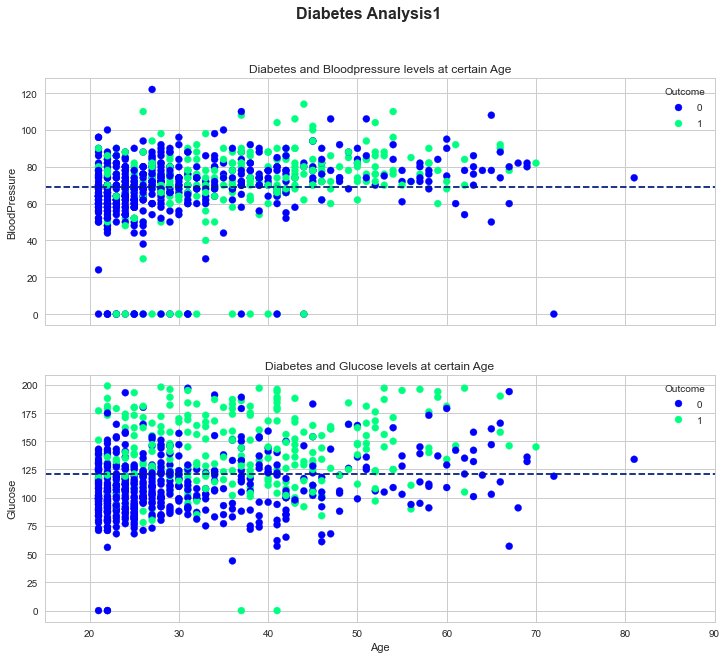

In [65]:
#plt.style.use("seaborn-dark-palette")
fig, ax = plt.subplots(2,1,figsize= (12,10),sharex = True)
scatter = ax[0].scatter(x=data['Age'],
                        y=data['BloodPressure'],
                        c=data["Outcome"],
                        cmap="winter")
scatter= ax[1].scatter(x=data["Age"],
                         y=data["Glucose"],
                         c=data["Outcome"],
                         cmap='winter')
ax[0].set(title = "Diabetes and Bloodpressure levels at certain Age",
      # xlabel = "Age",
       ylabel = "BloodPressure");
ax[1].set(title = "Diabetes and Glucose levels at certain Age",
       xlabel = "Age",
       ylabel = "Glucose");
#change the x axis limits
ax[0].set_xlim([15,90])

ax[0].legend(*scatter.legend_elements(), title="Outcome");
ax[1].legend(*scatter.legend_elements(), title="Outcome");
ax[0].axhline(data['BloodPressure'].mean(), linestyle = '--' );
ax[1].axhline(data['Glucose'].mean(), linestyle = '--' );
#add tittle to whole figure
fig.suptitle("Diabetes Analysis1", fontsize = 16, fontweight="bold");

## Customize Matplotlibs plots and getting stylish


In [51]:
#see the different style available
#plt.style.available

In [46]:
#data['Age'].plot(); #default style

In [47]:
#plt.style.use('seaborn-whitegrid') #styles matplotlib internally.

In [48]:
#data['Age'].plot(); #after styling

### Feature pre-processing

In [70]:
in_data = data['Insulin'].value_counts()
in_data

0      374
105     11
140      9
130      9
120      8
      ... 
193      1
191      1
188      1
184      1
846      1
Name: Insulin, Length: 186, dtype: int64

<h6>Here, we can see that about 50% of our data has zero insulin level. i.e <h6>

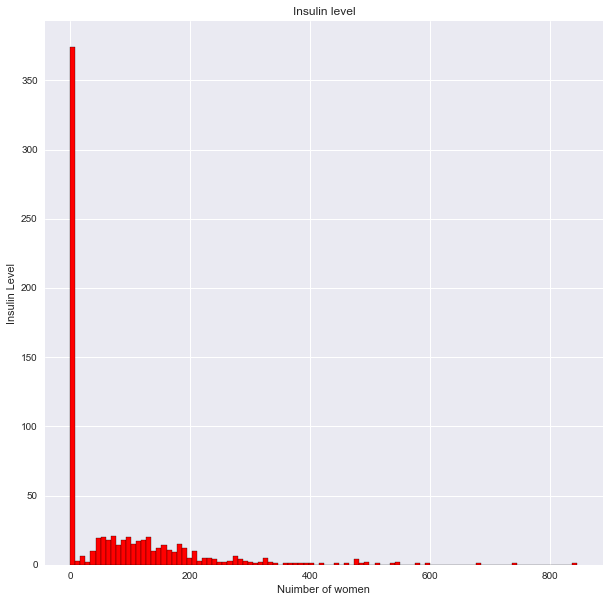

In [81]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (10,10))
histogram = ax.hist(data['Insulin'], bins = 100, edgecolor='black', color='Red')
ax.set(title='Insulin level',
       xlabel = 'Nuimber of women',
       ylabel = 'Insulin Level');

<h7>Hence, we can eliminate this feature.<h7>

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
data.drop('Insulin', axis=1, inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [98]:
x = data.iloc[:,:-1].values
x.shape

(768, 7)

In [100]:
y = data.iloc[:,-1].values
y.shape

(768,)

In [101]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state = 420)

In [103]:
train_x

array([[  4.   , 141.   ,  74.   , ...,  27.6  ,   0.244,  40.   ],
       [  2.   , 122.   ,  76.   , ...,  35.9  ,   0.483,  26.   ],
       [  7.   , 133.   ,  84.   , ...,  40.2  ,   0.696,  37.   ],
       ...,
       [  1.   , 119.   ,  44.   , ...,  35.5  ,   0.28 ,  25.   ],
       [  1.   , 100.   ,  66.   , ...,  32.   ,   0.444,  42.   ],
       [ 13.   , 126.   ,  90.   , ...,  43.4  ,   0.583,  42.   ]])

In [104]:
train_y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [128]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()

In [137]:
models = {'svc' : svc,'knn':knn,'dtc':dtc,'nb':nb}

In [138]:
model = knn.fit(train_x, train_y)

In [139]:
pred = model.predict(test_x)

In [140]:
accuracy_score(test_y, pred)

0.7662337662337663

In [157]:
model_accuracy = {}
for model in models.keys():
    mod = models[model].fit(train_x,train_y)
   # print(mod)
    predict = mod.predict(test_x)
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(test_y, predict)})



In [159]:
model_accuracy

{'svc': 0.7662337662337663,
 'knn': 0.7662337662337663,
 'dtc': 0.6818181818181818,
 'nb': 0.7662337662337663}